In [2]:
from google.colab import files
uploaded = files.upload()

Saving 01000_lr.dat to 01000_lr.dat
Saving 01000_lr.hea to 01000_lr.hea
Saving 01001_lr.dat to 01001_lr.dat


In [5]:
from google.colab import files
uploaded = files.upload()

Saving scp_statements.csv to scp_statements.csv


In [11]:
from google.colab import files
uploaded = files.upload()

Saving ptbxl_database.csv to ptbxl_database (1).csv


k = 2 | Silhouette = 0.3667 | CH Score = 3601.2921 | DB Index = 1.0438
k = 3 | Silhouette = 0.4057 | CH Score = 5327.5002 | DB Index = 0.7308
k = 4 | Silhouette = 0.3029 | CH Score = 4992.1655 | DB Index = 0.9281
k = 5 | Silhouette = 0.3027 | CH Score = 4722.6692 | DB Index = 0.9346
k = 6 | Silhouette = 0.2787 | CH Score = 4517.5359 | DB Index = 0.9764
k = 7 | Silhouette = 0.2725 | CH Score = 4245.7046 | DB Index = 0.9766
k = 8 | Silhouette = 0.2654 | CH Score = 4060.4008 | DB Index = 0.9961
k = 9 | Silhouette = 0.2605 | CH Score = 3874.0575 | DB Index = 1.0126
k = 10 | Silhouette = 0.2626 | CH Score = 3774.6481 | DB Index = 0.9326


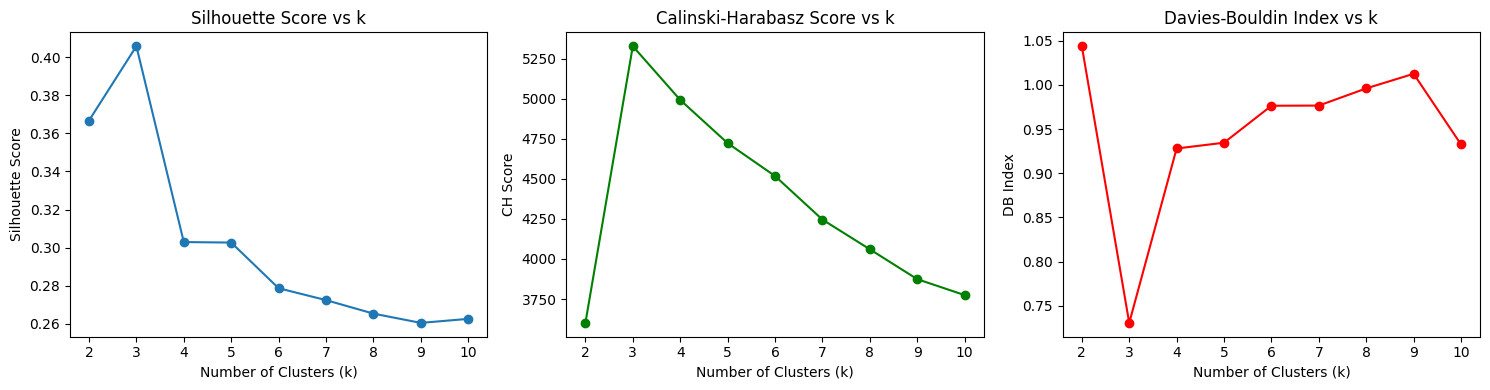

In [27]:
#A6
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# -------------------------------
# Function to preprocess data
# -------------------------------
def preprocess_data(file_path, features_to_use):
    """
    Loads CSV, selects given features, handles NaN, and scales the data.
    """
    df = pd.read_csv(file_path)
    X = df[features_to_use].dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# -------------------------------
# Function to run KMeans for multiple k values
# -------------------------------
def evaluate_kmeans_multiple_k(X, k_values, random_state=42, n_init=10):
    """
    Runs KMeans for each k, computes metrics, and stores results.
    Returns a dictionary with metrics per k.
    """
    results = {"k": [], "silhouette": [], "ch_score": [], "db_index": []}

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=n_init)
        labels = kmeans.fit_predict(X)

        sil_score = silhouette_score(X, labels)
        ch_score = calinski_harabasz_score(X, labels)
        db_score = davies_bouldin_score(X, labels)

        results["k"].append(k)
        results["silhouette"].append(sil_score)
        results["ch_score"].append(ch_score)
        results["db_index"].append(db_score)

    return results

# -------------------------------
# Function to plot metrics vs k
# -------------------------------
def plot_kmeans_metrics(results):
    """
    Plots Silhouette Score, CH Score, and DB Index against k.
    """
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))

    axs[0].plot(results["k"], results["silhouette"], marker="o")
    axs[0].set_title("Silhouette Score vs k")
    axs[0].set_xlabel("Number of Clusters (k)")
    axs[0].set_ylabel("Silhouette Score")

    axs[1].plot(results["k"], results["ch_score"], marker="o", color="green")
    axs[1].set_title("Calinski-Harabasz Score vs k")
    axs[1].set_xlabel("Number of Clusters (k)")
    axs[1].set_ylabel("CH Score")

    axs[2].plot(results["k"], results["db_index"], marker="o", color="red")
    axs[2].set_title("Davies-Bouldin Index vs k")
    axs[2].set_xlabel("Number of Clusters (k)")
    axs[2].set_ylabel("DB Index")

    plt.tight_layout()
    plt.show()

# -------------------------------
# Main Execution
# -------------------------------
if __name__ == "__main__":
    # Step 1: Load and preprocess ECG dataset
    file_path = "ptbxl_database.csv"
    features_to_use = ["age", "height", "weight"]  # Example numeric columns
    X_scaled = preprocess_data(file_path, features_to_use)

    # Step 2: Run KMeans for k = 2 to 10
    k_values = range(2, 11)
    results = evaluate_kmeans_multiple_k(X_scaled, k_values)

    # Step 3: Print results
    for i in range(len(results["k"])):
        print(f"k = {results['k'][i]} | Silhouette = {results['silhouette'][i]:.4f} | "
              f"CH Score = {results['ch_score'][i]:.4f} | DB Index = {results['db_index'][i]:.4f}")

    # Step 4: Plot results
    plot_kmeans_metrics(results)
